## Goal Management in a Department Analysis (Flag 78)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow `sn_gf_goal` table, which details various attributes related to organizational goals. These attributes include goal state, owner, department, start and end dates, and description, alongside metrics such as priority, percent complete, and target percentage. This data primarily tracks the progression and management of departmental and individual goals, offering insights into the effectiveness and alignment of these goals with broader organizational objectives. Additionally, the table captures updates made to each goal, providing a timeline of modifications and the identity of individuals making these updates.

### Your Task
**Goal**: Analyze the anomaly of increasing durations of 'Cost Reduction' goals within the Finance department to identify underlying causes and propose solutions to enhance goal management.

**Role**: Strategic Goal Analyst

**Difficulty**: 4 out of 5. This analysis requires ability to interpret complex data trends

**Category**: Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [10]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the goals dataset used in the analysis. The dataset is assumed to be stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [11]:
dataset_path = "csvs/flag-78.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,sys_updated_by,department,start_date,target_percentage,category,priority,state,metric,end_date,owner,percent_complete,sys_id,description
0,admin,Finance,2022-01-31,89,Efficiency,Medium,Planned,Survey Score,2022-04-04,user079,51,G000000,Optimize IT support workflows to decrease tick...
1,admin,Marketing,2022-07-24,84,Cost Reduction,Low,Cancelled,Survey Score,2023-05-06,user080,54,G000001,Reduce overhead expenses by optimizing supplie...
2,admin,Finance,2022-02-07,88,Revenue Growth,Low,Planned,Sales Increase,2022-06-10,user098,59,G000002,Increase annual revenue by 20% through expansi...
3,admin,Marketing,2022-03-15,77,Revenue Growth,Medium,In Progress,Sales Increase,2022-07-14,user051,20,G000003,Strategize to increase annual subscription rev...
4,admin,Finance,2022-06-30,77,Cost Reduction,Low,In Progress,Survey Score,2023-03-29,user020,58,G000004,Reduce operational expenses by optimizing ener...


### **Question 1: How does the completion percentage of projects relate to their planned priorities?**


#### Exploring Completion vs. Priority Levels
This question examines if higher-priority projects tend to have a higher completion percentage, potentially indicating a focus on finishing more critical projects first. By analyzing this relationship, we can gain insights into how prioritization impacts project progression.

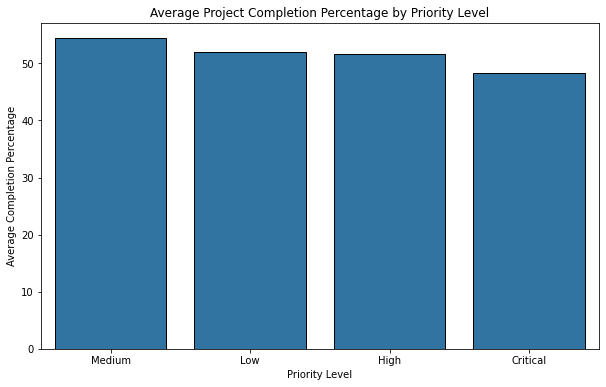

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
flag_data = pd.read_csv("csvs/flag-78.csv")

# Aggregate data to calculate the mean completion percentage by priority level
completion_by_priority = (
    flag_data.groupby("priority")["percent_complete"].mean().reset_index()
)

# Sort priorities by completion percentage for a clearer visualization
completion_by_priority = completion_by_priority.sort_values(
    by="percent_complete", ascending=False
)

# Plot the average completion percentage for each priority level
plt.figure(figsize=(10, 6))
sns.barplot(
    data=completion_by_priority, x="priority", y="percent_complete", edgecolor="black"
)

# Title and labels
plt.title("Average Project Completion Percentage by Priority Level")
plt.xlabel("Priority Level")
plt.ylabel("Average Completion Percentage")

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "correlative",
    "insight": "Medium-priority projects have the highest average completion rate, while critical-priority projects have the lowest.",
    "insight_value": {
        "description": "Medium-priority projects show a higher average completion rate (54.41%), compared to low (51.95%), high (51.60%), and critical (48.24%) priority levels, suggesting that resources may focus more on medium-priority projects, potentially due to resource allocation patterns or project complexity."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Project Completion Percentage by Priority Level",
        "x_axis": {
            "name": "Priority Level",
            "value": ["Critical", "High", "Low", "Medium"],
            "description": "Represents the priority levels assigned to projects in the organization.",
        },
        "y_axis": {
            "name": "Average Completion Percentage",
            "value": "Ranges from 48% to 54%",
            "description": "The average percentage completion of projects at each priority level.",
        },
        "description": "The bar plot reveals that medium-priority projects are, on average, completed at higher percentages than high or critical projects, possibly indicating a focus shift towards these projects.",
    },
    "question": "How does the completion percentage of projects relate to their planned priorities?",
    "actionable_insight": "This pattern suggests that the organization may prioritize medium-priority projects, possibly due to their scope or complexity. Revisiting resource allocation strategies to support critical projects could improve outcomes for high-impact initiatives. Additionally, tracking whether lower completion rates in critical projects are due to complexity, resource limits, or other factors may help realign project priorities and drive higher completion rates in essential areas.",
}

{'data_type': 'correlative',
 'insight': 'Medium-priority projects have the highest average completion rate, while critical-priority projects have the lowest.',
 'insight_value': {'description': 'Medium-priority projects show a higher average completion rate (54.41%), compared to low (51.95%), high (51.60%), and critical (48.24%) priority levels, suggesting that resources may focus more on medium-priority projects, potentially due to resource allocation patterns or project complexity.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Project Completion Percentage by Priority Level',
  'x_axis': {'name': 'Priority Level',
   'value': ['Critical', 'High', 'Low', 'Medium'],
   'description': 'Represents the priority levels assigned to projects in the organization.'},
  'y_axis': {'name': 'Average Completion Percentage',
   'value': 'Ranges from 48% to 54%',
   'description': 'The average percentage completion of projects at each priority level.'},
  'description': 'The bar plot reveals

### **Question 2:** What is distribution of Goal categories in Finance department?

#### Plot distribution of goal categories within the Finance department

This pie chart illustrates the proportion of different goal categories within the Finance department, revealing the predominance of specific goals and highlighting departmental focus areas.

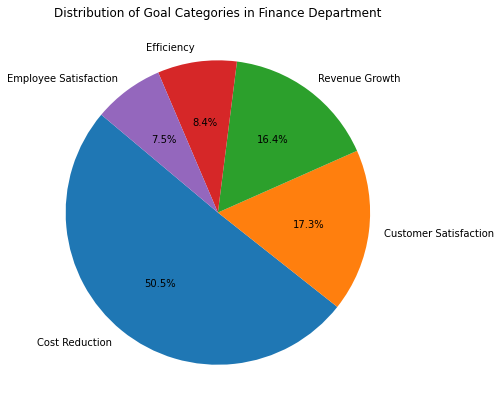

In [14]:
import matplotlib.pyplot as plt

# Filter data for the Finance department
finance_goals = goal_data[goal_data['department'] == 'Finance']

# Count the occurrence of each category in the Finance department
category_counts = finance_goals['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Goal Categories in Finance Department')
plt.show()


#### Generate JSON Description for the Insight

In [15]:
{
    "data_type": "descriptive",
    "insight": "The cost reduction goals dominate the goal types in the Finance department",
    "insight_value": {
        "Cost Reduction": "50.5%",
        "Revenue Growth": "16.4%",
        "Customer Satisfaction": "17.3%",
        "Efficiency": "8.4%",
        "Employee Satisfaction": "7.5%"
    },
    "plot": {
        "plot_type": "pie",
        "title": "Distribution of Goal Categories in the Finance Department",
        "x_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not utilize an x-axis."
        },
        "y_axis": {
            "name": "None",
            "value": "None",
            "description": "Pie charts do not utilize a y-axis."
        },
        "description": "This pie chart illustrates the distribution of different goal categories within the Finance department. 'Cost Reduction' goals represent a significant majority, accounting for 50.5% of all goals. This is followed by 'Customer Satisfaction' at 17.3% and 'Revenue Growth' at 16.4%, with 'Efficiency' and 'Employee Satisfaction' goals at 8.4% and 7.5% respectively. The prevalence of 'Cost Reduction' goals indicates a strong strategic focus on cost management within the department."
    },
    "question": "What is the distribution of Goal categories in the Finance department?",
    "Actionable Insight": "Given the predominant focus on 'Cost Reduction', it may be reason for what differentiates Finance department from others, and it is further beneficial for the Finance department to reassess the balance of goal categories to ensure a holistic approach to departmental objectives. Broadening the focus to include other categories like 'Employee Satisfaction' and 'Efficiency' could foster a more diverse and resilient operational strategy, potentially leading to enhanced overall department performance."
}


{'data_type': 'descriptive',
 'insight': 'The cost reduction goals dominate the goal types in the Finance department',
 'insight_value': {'Cost Reduction': '50.5%',
  'Revenue Growth': '16.4%',
  'Customer Satisfaction': '17.3%',
  'Efficiency': '8.4%',
  'Employee Satisfaction': '7.5%'},
 'plot': {'plot_type': 'pie',
  'title': 'Distribution of Goal Categories in the Finance Department',
  'x_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not utilize an x-axis.'},
  'y_axis': {'name': 'None',
   'value': 'None',
   'description': 'Pie charts do not utilize a y-axis.'},
  'description': "This pie chart illustrates the distribution of different goal categories within the Finance department. 'Cost Reduction' goals represent a significant majority, accounting for 50.5% of all goals. This is followed by 'Customer Satisfaction' at 17.3% and 'Revenue Growth' at 16.4%, with 'Efficiency' and 'Employee Satisfaction' goals at 8.4% and 7.5% respectively. The prevalen

### **Question 3:** How have the durations of 'Cost Reduction' goals changed over time across all departments

#### Plot trend analysis of Cost Reduction goal durations

This scatter plot and trend line analysis depict the changing durations of 'Cost Reduction' goals over time across departments, revealing any linear trends or shifts in goal completion times related to their start dates. This visualization aids in understanding any temporal dynamics affecting efficiency of cost reduction initiatives.

<ipython-input-16-7841f953726a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals["start_date_numeric"] = (
<ipython-input-16-7841f953726a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals["duration"] = (


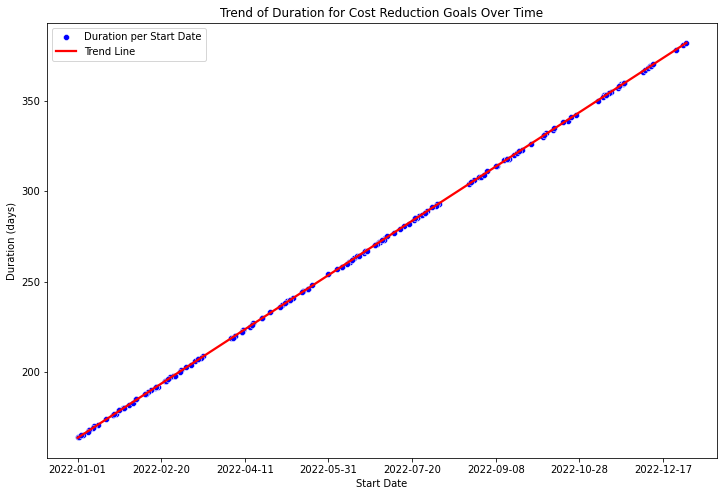

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert date columns to datetime first
goal_data["start_date"] = pd.to_datetime(goal_data["start_date"])
goal_data["end_date"] = pd.to_datetime(goal_data["end_date"])

# Filter data to include only 'Cost Reduction' category
cost_reduction_goals = goal_data[goal_data["category"] == "Cost Reduction"]

# Convert start_date to numerical days since the first date in the dataset for regression analysis
cost_reduction_goals["start_date_numeric"] = (
    cost_reduction_goals["start_date"] - cost_reduction_goals["start_date"].min()
).dt.days

# Prepare data for plotting
cost_reduction_goals["duration"] = (
    cost_reduction_goals["end_date"] - cost_reduction_goals["start_date"]
).dt.days

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, color='blue', label='Duration per Start Date')

# Convert numeric dates back to dates for labeling on x-axis
label_dates = pd.date_range(start=cost_reduction_goals['start_date'].min(), periods=cost_reduction_goals['start_date_numeric'].max()+1, freq='D')
plt.xticks(ticks=range(0, cost_reduction_goals['start_date_numeric'].max()+1, 50),  # Adjust ticks frequency as needed
           labels=[date.strftime('%Y-%m-%d') for date in label_dates[::50]])

sns.regplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, scatter=False, color='red', label='Trend Line')

plt.title('Trend of Duration for Cost Reduction Goals Over Time')
plt.xlabel('Start Date')
plt.ylabel('Duration (days)')
plt.legend()
plt.show()

#### Generate JSON Description for the Insight

In [17]:
{
    "data_type": "trend diagnosis",
    "insight": "There is an increasing trend in the duration of 'Cost Reduction' goals over time",
    "insight_value": {
        "Trend": "Linear increase",
        "Correlation": "Positive correlation between start date and goal duration"
    },
    "plot": {
        "plot_type": "scatter with trend line",
        "title": "Trend of Duration for Cost Reduction Goals Over Time",
        "x_axis": {
            "name": "Start Date",
            "value": "Numeric representation converted from actual dates",
            "description": "This axis represents the start dates of 'Cost Reduction' goals, converted to numerical values to facilitate trend analysis."
        },
        "y_axis": {
            "name": "Duration (days)",
            "value": "Dynamic based on data",
            "description": "This shows the durations of 'Cost Reduction' goals, illustrating how they have changed over time as represented by the trend line."
        },
        "description": "The scatter plot with a regression trend line demonstrates a linear increasing correlation between the start date of 'Cost Reduction' goals and their durations. This trend suggests that over time, 'Cost Reduction' goals are taking longer to complete. The plot uses numerical days since the first date in the dataset for regression analysis, with x-axis labels converted back to dates for clarity."
    },
    "question": "How have the durations of 'Cost Reduction' goals changed over time across all departments?",
    "actionable insight": "The observed increasing trend in durations calls for an in-depth analysis to identify underlying causes, such as changes in organizational processes, increased goal complexity, or resource allocation issues. Understanding these factors can help in implementing strategic measures to optimize the planning and execution"
}


{'data_type': 'trend diagnosis',
 'insight': "There is an increasing trend in the duration of 'Cost Reduction' goals over time",
 'insight_value': {'Trend': 'Linear increase',
  'Correlation': 'Positive correlation between start date and goal duration'},
 'plot': {'plot_type': 'scatter with trend line',
  'title': 'Trend of Duration for Cost Reduction Goals Over Time',
  'x_axis': {'name': 'Start Date',
   'value': 'Numeric representation converted from actual dates',
   'description': "This axis represents the start dates of 'Cost Reduction' goals, converted to numerical values to facilitate trend analysis."},
  'y_axis': {'name': 'Duration (days)',
   'value': 'Dynamic based on data',
   'description': "This shows the durations of 'Cost Reduction' goals, illustrating how they have changed over time as represented by the trend line."},
  'description': "The scatter plot with a regression trend line demonstrates a linear increasing correlation between the start date of 'Cost Reduction'

### **Question 4:** What are the potential future trends in the duration of 'Cost Reduction' goals across all departments if current operational and strategic practices remain unchanged?

#### Plot future trend predictions of Cost Reduction goal durations

This plot projects future trends in the durations of 'Cost Reduction' goals across all departments, assuming no change in current operational practices. The scatter plot provides historical data points, while the green dashed line forecasts potential future durations based on linear regression analysis. 

<ipython-input-18-796a85d7db27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals["start_date"] = pd.to_datetime(cost_reduction_goals["start_date"])
<ipython-input-18-796a85d7db27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_reduction_goals["end_date"] = pd.to_datetime(cost_reduction_goals["end_date"])
<ipython-input-18-796a85d7db27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

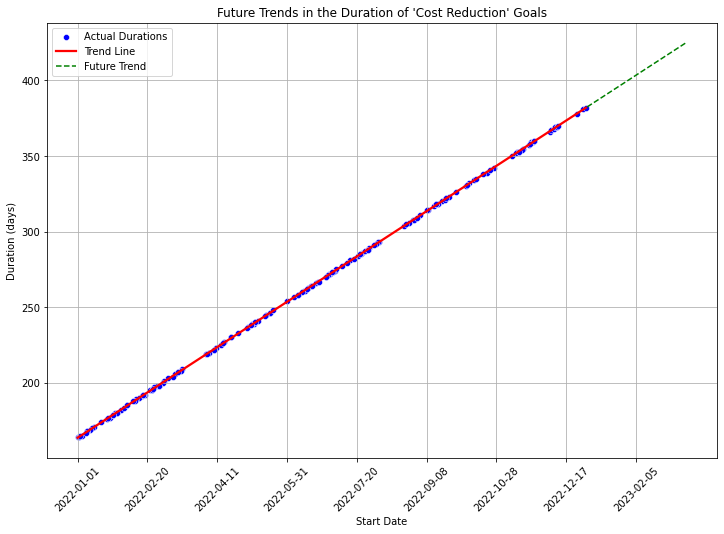

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert string dates to datetime first
cost_reduction_goals["start_date"] = pd.to_datetime(cost_reduction_goals["start_date"])
cost_reduction_goals["end_date"] = pd.to_datetime(cost_reduction_goals["end_date"])


# Assuming 'goal_data' is preloaded and contains the relevant data for 'Cost Reduction' category
cost_reduction_goals = goal_data[goal_data['category'] == 'Cost Reduction']

# Convert start_date to a numeric value for regression (number of days since the first date)
cost_reduction_goals['start_date_numeric'] = (cost_reduction_goals['start_date'] - cost_reduction_goals['start_date'].min()).dt.days

# Calculate durations
cost_reduction_goals['duration'] = (cost_reduction_goals['end_date'] - cost_reduction_goals['start_date']).dt.days

# Prepare data for regression model
X = cost_reduction_goals[['start_date_numeric']]  # Features
y = cost_reduction_goals['duration']  # Target

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict future durations
# Extend the date range by, say, 20% more time into the future for forecasting
future_dates = np.arange(X['start_date_numeric'].max() + 1, X['start_date_numeric'].max() * 1.2, dtype=int).reshape(-1, 1)
future_predictions = model.predict(future_dates)

# Plotting
plt.figure(figsize=(12, 8))
# Scatter plot for existing data
sns.scatterplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, color='blue', label='Actual Durations')
# Regression line for existing data
sns.regplot(x='start_date_numeric', y='duration', data=cost_reduction_goals, scatter=False, color='red', label='Trend Line')
# Plot for future predictions
plt.plot(future_dates.flatten(), future_predictions, 'g--', label='Future Trend')
# Convert numeric dates back to actual dates for labeling on x-axis
actual_dates = pd.date_range(start=cost_reduction_goals['start_date'].min(), periods=int(1.2 * X['start_date_numeric'].max()), freq='D')
plt.xticks(ticks=range(0, int(1.2 * X['start_date_numeric'].max()), 50), labels=[date.strftime('%Y-%m-%d') for date in actual_dates[::50]], rotation=45)
plt.title('Future Trends in the Duration of \'Cost Reduction\' Goals')
plt.xlabel('Start Date')
plt.ylabel('Duration (days)')
plt.legend()
plt.grid(True)
plt.show()

#### Generate JSON Description for the Insight

In [19]:
{
    "data_type": "predictive",
    "insight": "Continued linear increase in the duration of 'Cost Reduction' goals across all departments",
    "insight_value": {
        "Trend": "Linear increase",
        "Future Projection": "Duration of 'Cost Reduction' goals expected to increase steadily if current operational and strategic practices remain unchanged"
    },
    "plot": {
        "plot_type": "regression",
        "title": "Predictive Trend Analysis for the Duration of 'Cost Reduction' Goals",
        "x_axis": {
            "name": "Start Date",
            "value": "Time period extended beyond current data",
            "description": "This axis represents the time period, including both historical data and future projections, illustrating the trend in goal durations."
        },
        "y_axis": {
            "name": "Duration (days)",
            "value": "Dynamic based on model predictions",
            "description": "This shows the predicted durations of 'Cost Reduction' goals over time, reflecting a continuous increase."
        },
        "description": "The regression analysis predicts a continued linear increase in the duration of 'Cost Reduction' goals. The trend line, extended beyond the current data into the future, suggests that without changes in current strategies or operations, the time required to achieve these goals will progressively lengthen. This projection is visualized through a combination of actual data points and a projected trend line in green, indicating future expectations."
    },
    "question": "What are the potential future trends in the duration of 'Cost Reduction' goals across all departments if current operational and strategic practices remain unchanged?",
    "Actionable Insight": "The projection of increasing goal durations highlights the need for a strategic review and potential overhaul of current processes and resource allocations concerning 'Cost Reduction' goals. To counteract the rising trend, it may be necessary to enhance efficiency through streamlined processes, better resource management, or revisiting the complexity and scope of these goals. Such actions could help stabilize or reduce the durations, aligning them more closely with organizational efficiency targets."
}


{'data_type': 'predictive',
 'insight': "Continued linear increase in the duration of 'Cost Reduction' goals across all departments",
 'insight_value': {'Trend': 'Linear increase',
  'Future Projection': "Duration of 'Cost Reduction' goals expected to increase steadily if current operational and strategic practices remain unchanged"},
 'plot': {'plot_type': 'regression',
  'title': "Predictive Trend Analysis for the Duration of 'Cost Reduction' Goals",
  'x_axis': {'name': 'Start Date',
   'value': 'Time period extended beyond current data',
   'description': 'This axis represents the time period, including both historical data and future projections, illustrating the trend in goal durations.'},
  'y_axis': {'name': 'Duration (days)',
   'value': 'Dynamic based on model predictions',
   'description': "This shows the predicted durations of 'Cost Reduction' goals over time, reflecting a continuous increase."},
  'description': "The regression analysis predicts a continued linear increas

### **Question 5:** What is the trend in completion percentages of projects across different departments over time?


### Exploring Trends in Completion Percentages by Department Over Time
This visualization examines the average completion percentage of projects over time for each department. By observing these trends, we gain insight into how efficiently departments progress toward project goals over time and can identify patterns in project completion dynamics within different departments.

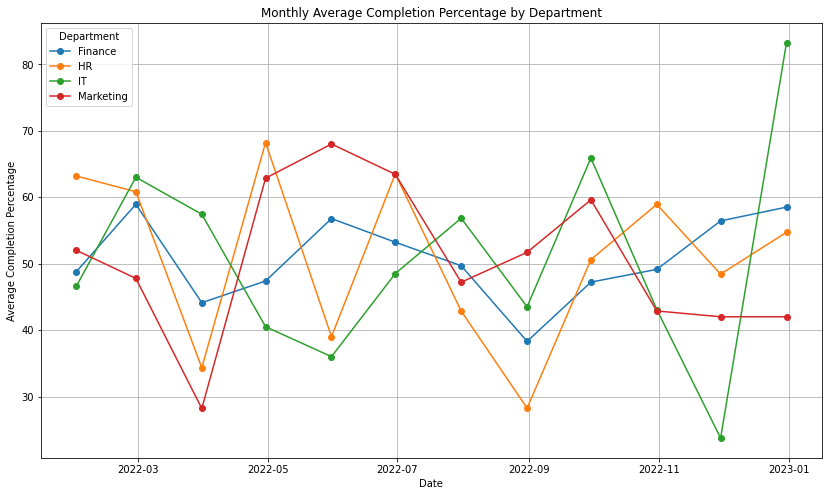

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
flag_data = pd.read_csv("csvs/flag-78.csv")

# Convert 'start_date' to datetime for accurate plotting
flag_data["start_date"] = pd.to_datetime(flag_data["start_date"])

# Group by 'department' and time ('start_date' monthly) to calculate mean 'percent_complete'
monthly_completion_trend = (
    flag_data.groupby([pd.Grouper(key="start_date", freq="M"), "department"])[
        "percent_complete"
    ]
    .mean()
    .reset_index()
)

# Pivot the data to have departments as columns for easy plotting
trend_pivot = monthly_completion_trend.pivot(
    index="start_date", columns="department", values="percent_complete"
)

# Plot the trend of completion percentages for each department over time
plt.figure(figsize=(14, 8))
for department in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[department], marker="o", label=department)

plt.title("Monthly Average Completion Percentage by Department")
plt.xlabel("Date")
plt.ylabel("Average Completion Percentage")
plt.legend(title="Department")
plt.grid(True)
plt.show()

In [21]:
{
    "data_type": "trend_analysis",
    "insight": "There is significant variation in project completion rates over time across departments, with IT showing the most dramatic swings in completion percentage.",
    "insight_value": {
        "description": "IT projects display a high range in completion percentages, suggesting either variable project scopes or resource allocation shifts, while Finance and Marketing departments maintain more stable, consistent completion rates closer to the average."
    },
    "plot": {
        "plot_type": "line",
        "title": "Monthly Average Completion Percentage by Department",
        "x_axis": {
            "name": "Date",
            "value": "Monthly intervals from the earliest to latest recorded start date",
            "description": "This axis represents time, allowing us to see monthly changes in project completion.",
        },
        "y_axis": {
            "name": "Average Completion Percentage",
            "value": "Ranges from the lowest to highest recorded monthly averages by department",
            "description": "This axis represents the average completion percentage for each department, enabling us to see which departments tend to have higher or lower completion rates.",
        },
        "description": "The line plot shows a marked trend where IT exhibits the widest fluctuations in project completion percentages, while departments like Finance show steadier, lower variance trends.",
    },
    "question": "What is the trend in completion percentages of projects across different departments over time?",
    "actionable_insight": "The variability observed in IT's completion percentages could benefit from a closer look into project scopes or resource adjustments. Identifying high-variance periods may help in resource planning and setting realistic completion goals. Conversely, the steadier trends in Finance and Marketing indicate more predictable project flows, which could serve as a benchmark for consistency across departments.",
}

{'data_type': 'trend_analysis',
 'insight': 'There is significant variation in project completion rates over time across departments, with IT showing the most dramatic swings in completion percentage.',
 'insight_value': {'description': 'IT projects display a high range in completion percentages, suggesting either variable project scopes or resource allocation shifts, while Finance and Marketing departments maintain more stable, consistent completion rates closer to the average.'},
 'plot': {'plot_type': 'line',
  'title': 'Monthly Average Completion Percentage by Department',
  'x_axis': {'name': 'Date',
   'value': 'Monthly intervals from the earliest to latest recorded start date',
   'description': 'This axis represents time, allowing us to see monthly changes in project completion.'},
  'y_axis': {'name': 'Average Completion Percentage',
   'value': 'Ranges from the lowest to highest recorded monthly averages by department',
   'description': 'This axis represents the average comp

### Summary of Findings (Flag 78):

1. **Completion vs. Priority Levels**: Derived from Question 1, the analysis shows that medium-priority projects have the highest average completion rate, while critical-priority projects have the lowest. This suggests a potential misalignment in resource allocation, where medium-priority projects may be receiving more focus than critical ones.

2. **Goal Category Distribution in Finance**: Insights from Question 2 reveal that 'Cost Reduction' goals dominate the Finance department, accounting for 50.5% of all goals. This heavy focus on cost management may overshadow other important areas like 'Employee Satisfaction' and 'Efficiency', suggesting a need for a more balanced approach.

3. **Trend in 'Cost Reduction' Goal Durations**: From Questions 3 and 4, there is a linear increase in the duration of 'Cost Reduction' goals over time. This trend suggests potential inefficiencies or increased complexity in these goals, necessitating a strategic review to optimize their management and execution.